In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/pitch/pitches2018.csv')

In [7]:
df.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')

In [8]:
df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.239615,1.848781,93.7,84.5,2632.270,233.718,43.7,5.8,23.7,-19.911162,...,3,0.0,2.018000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.804047,0.925201,94.0,85.8,2561.181,236.246,42.7,6.1,23.8,-20.043108,...,4,0.0,2.018000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,0.598637,1.616677,94.7,86.5,2673.854,237.996,44.4,6.0,23.8,-21.510485,...,5,0.0,2.018000e+09,1.0,1.0,0.0,3.0,0.0,0.0,0.0
3,1.453223,1.466314,82.3,76.7,959.909,38.861,-8.2,10.8,23.9,4.974062,...,6,0.0,2.018000e+09,1.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-0.427914,2.490041,95.4,87.1,2408.148,241.080,40.9,6.1,23.8,-20.172978,...,7,0.0,2.018000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [9]:
df_full = pd.read_csv('data/pitch/pitches.csv')

In [10]:
df_full.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [11]:
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [12]:
def convert(dataframe):
    for colname in dataframe.columns:
        if dataframe[colname].dtype == 'O':
            dataframe[colname] = dataframe[colname].astype(str)
    return dataframe

d = convert(df_full.sample(2000))

In [13]:
%R -i d

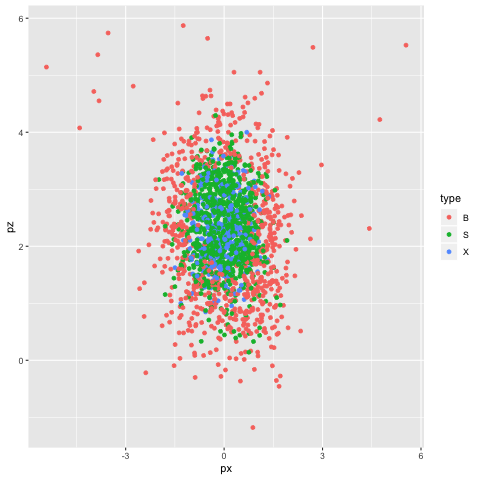

In [14]:
%%R

ggplot(aes(x=px, y=pz, color = type), data = d) + geom_point()

In [17]:
g = pd.read_csv('data/pitch/games.csv')

In [18]:
g.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0
